In [2]:
DATASETS_ALREADY_LOADED = False
MODEL_ALREADY_TRAINED = False



### Paramentros configuráveis:
- BATCH_SIZE
- Número de neurónios
- NUMBER_OF_EPOCHS
- LEARNING_RATE
- optimizer (keras.optimizers.RMSprop())
- loss function (sparse_categorical_crossentropy)

# Ponto de partida

A ideia inicial, foi criar uma estrutura básica de referencia, com valores de parametros baseado em alguns exemplos e realizar o processo a partir daí. O primeiro objetivo foi criar um overfitting intencional, e a partir de esse ponto ir afinando os hiper paramentros até se modelo deixar de estar em overfitting.
Utilizando um batch size pré-definido de 128, fomos alterando consequetivamente o numero de neurónios, nomeadamente os neurónios das camadas convolucionais. 



In [3]:
if not MODEL_ALREADY_TRAINED and not DATASETS_ALREADY_LOADED:
  from keras.utils import image_dataset_from_directory

  IMG_SIZE = 32
  BATCH_SIZE = 256

  # TRAIN_DIR = '/content/drive/MyDrive/train'
  # VALIDATION_DIR = '/content/drive/MyDrive/validation'
  # TEST_DIR = '/content/drive/MyDrive/test'
  TRAIN_DIR = 'train'
  #VALIDATION_DIR = 'validation'
  VALIDATION_DIR = 'validation'
  TEST_DIR = 'test'

  train_dataset = image_dataset_from_directory(TRAIN_DIR,image_size=(IMG_SIZE, IMG_SIZE),batch_size=BATCH_SIZE)
  validation_dataset = image_dataset_from_directory(VALIDATION_DIR,image_size=(IMG_SIZE, IMG_SIZE),batch_size=BATCH_SIZE)
  test_dataset = image_dataset_from_directory(TEST_DIR,image_size=(IMG_SIZE, IMG_SIZE),batch_size=BATCH_SIZE)
  # train_dataset = image_dataset_from_directory(TRAIN_DIR,batch_size=BATCH_SIZE)
  # validation_dataset = image_dataset_from_directory(VALIDATION_DIR,batch_size=BATCH_SIZE)
  # test_dataset = image_dataset_from_directory(TEST_DIR,batch_size=BATCH_SIZE)
else:
  print('No images were intencionally loaded! :-)')

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


The image_dataset_from_directory function returns a Dataset object that:
1. Reads the picture files
2. Decodes the JPEG content to RGB grids of pixels
3. Converts these into floating-point tensors
4. Resizes them to a shared size ( 32 × 32)
5. Packs them into batches ( 32 images )

The shape of each batch

In [4]:
''' for data_batch, labels_batch in train_dataset:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break '''

" for data_batch, labels_batch in train_dataset:\n  print('data batch shape:', data_batch.shape)\n  print('labels batch shape:', labels_batch.shape)\n  break "

Viewing the first 5 images of the first batch


In [5]:
''' import matplotlib.pyplot as plt

for data_batch, _ in train_dataset.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show() '''

' import matplotlib.pyplot as plt\n\nfor data_batch, _ in train_dataset.take(1):\n  for i in range(5):\n    plt.imshow(data_batch[i].numpy().astype("uint8"))\n    plt.show() '

Para a arquitetura da camada convolucional, numa primeira abordagem, foram utilizadas 3 camadas, com 32, 64, 128 respetivamente.
Para o classificador, 2 camadas, a primeira com 64 e a ultima as 10.

In [11]:
if not MODEL_ALREADY_TRAINED:
  from tensorflow import keras
  from keras import layers

  inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
  x = layers.Rescaling(1./255)(inputs)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation="relu")(x)
  outputs = layers.Dense(10, activation="softmax")(x)

  model = keras.Model(inputs=inputs, outputs=outputs)

  model.summary()

else:
  print('MODEL_ALREADY_TRAINED option is set to True! :-)')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Pagina 202 do livro

In [12]:
if not MODEL_ALREADY_TRAINED:
  NUMBER_OF_EPOCHS = 30 # Exemplos da aula 30
  #LEARNING_RATE = 1e-2 # confirmar se é o dos exemplos
  # LEARNING_RATE = 0.001
  LEARNING_RATE = 0.001

  model.compile(optimizer=keras.optimizers.RMSprop(LEARNING_RATE),loss="sparse_categorical_crossentropy",metrics=["accuracy"]) # confirmar se está certo
  # keras.optimizers.Adam(learning_rate=0.0001)

  history = model.fit(train_dataset,epochs=NUMBER_OF_EPOCHS,validation_data=validation_dataset)

else:
  print('MODEL_ALREADY_TRAINED option is set to True! :-)')

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.2237 - loss: 2.1092 - val_accuracy: 0.2876 - val_loss: 2.0097
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.4155 - loss: 1.6351 - val_accuracy: 0.4116 - val_loss: 1.6123
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.4915 - loss: 1.4300 - val_accuracy: 0.5076 - val_loss: 1.3660
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.5489 - loss: 1.2932 - val_accuracy: 0.5219 - val_loss: 1.3537
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.5904 - loss: 1.1800 - val_accuracy: 0.5349 - val_loss: 1.3814
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 152ms/step - accuracy: 0.6204 - loss: 1.0992 - val_accuracy: 0.5614 - val_loss: 1.2251
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.6498 - loss: 1.0078 - val_accuracy: 0.5598 - val_loss: 1.2465
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.6741 - loss: 0.9515

In [8]:
#import pickle
# Save history object to a file
#with open('history.pkl', 'wb') as file:
#pickle.dump(history.history, file)
# Load history object from file
#with open('history.pkl', 'rb') as file:
#loaded_history = pickle.load(file)

In [9]:
val_loss, val_acc = model.evaluate(test_dataset)
print('val_acc:', val_acc)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6761 - loss: 0.9570
val_acc: 0.676800012588501


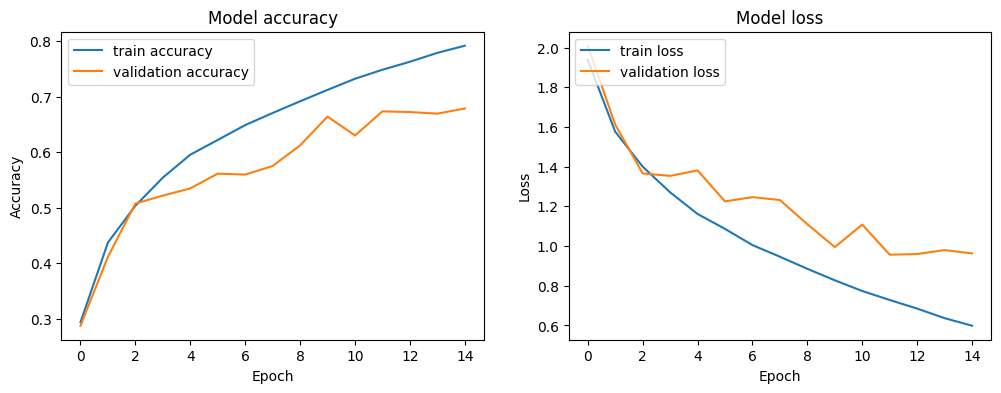

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

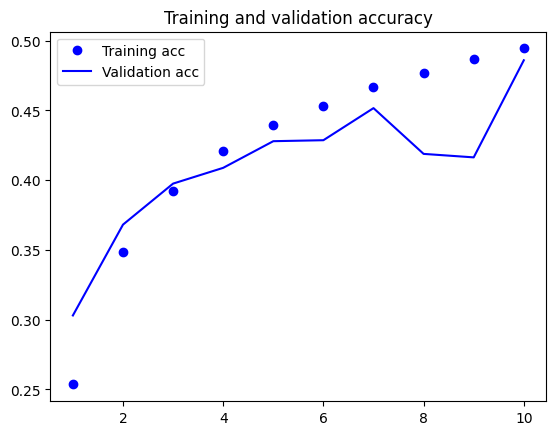

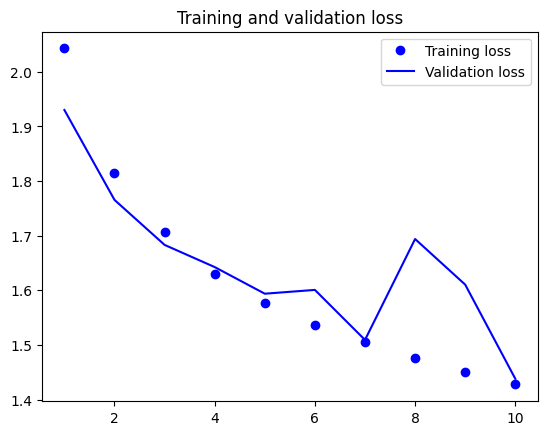

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Funcoes auto-augmentation
https://keras.io/api/layers/preprocessing_layers/image_augmentation/
RandomCrop layer
RandomFlip layer
RandomTranslation layer
RandomRotation layer
RandomZoom layer
RandomContrast layer
RandomBrightness layer
